# Assignment
# Hierarchical

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Removing the ID# column as we already have index which can be used as unique id
#Renaming the Award column as Award
airlines_data1 = airlines_data.drop(['ID#'],axis=1)
airlines_data1.rename(columns={'Award?':'Award'},inplace=True)
airlines_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airlines_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
airlines_data1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airlines_data1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [13]:
airlines_data1.shape

(3999, 11)

In [21]:
airlines_data1[airlines_data1.duplicated()].shape

(1, 11)

In [22]:
airlines_data1[airlines_data1.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [23]:
airlines_data1 = airlines_data1.drop_duplicates(ignore_index=True)

In [24]:
airlines_data1.shape

(3998, 11)

In [25]:
airlines_data1[airlines_data1.duplicated()].shape

(0, 11)

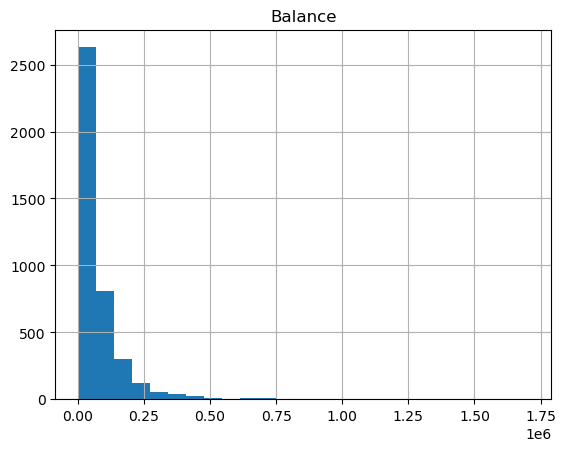

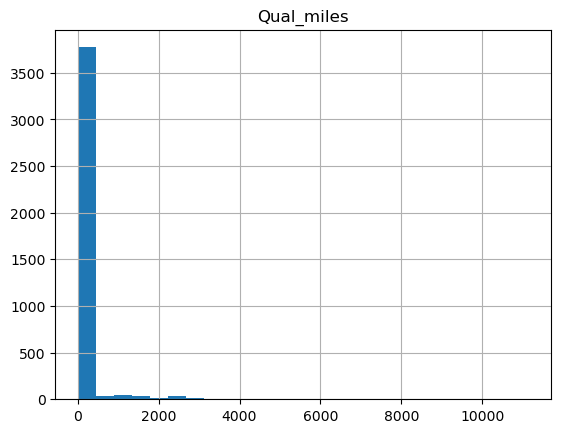

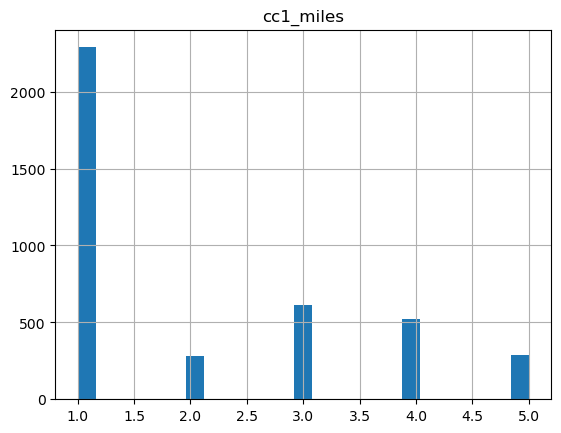

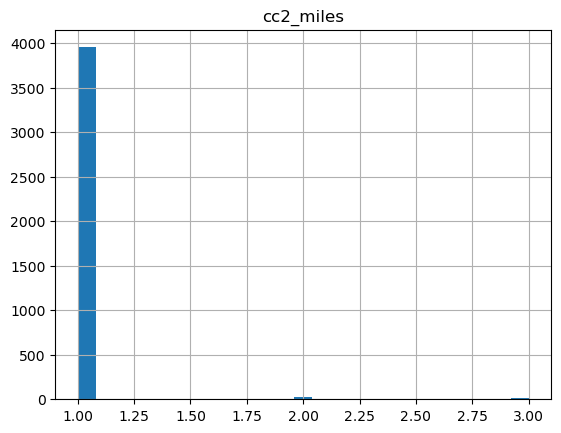

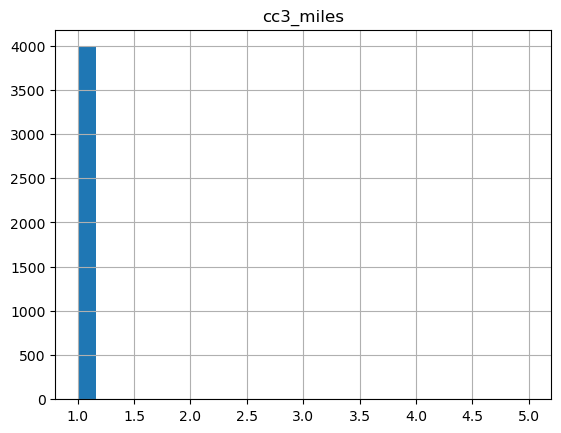

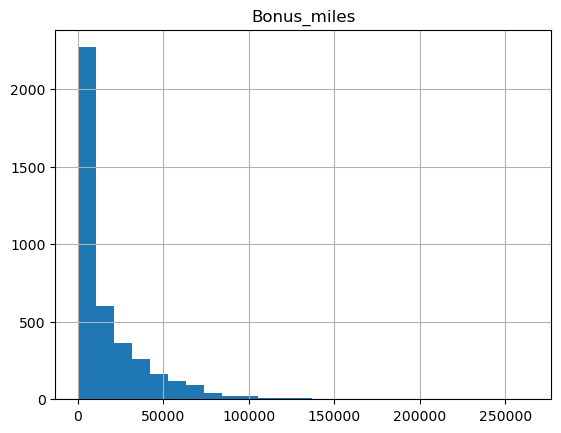

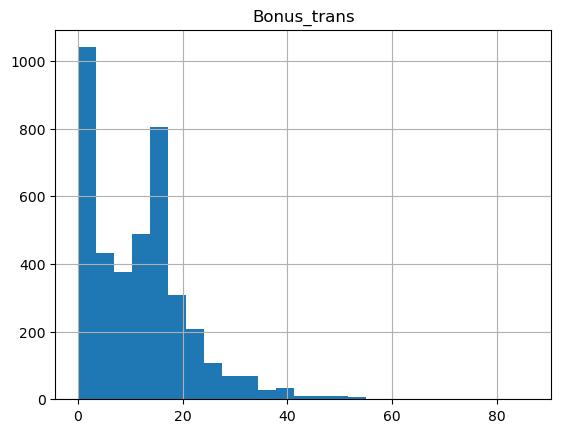

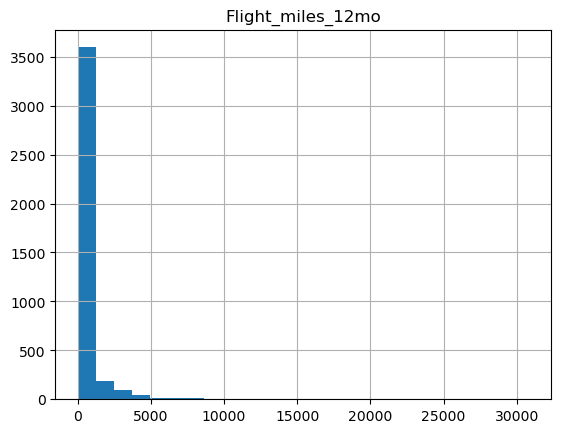

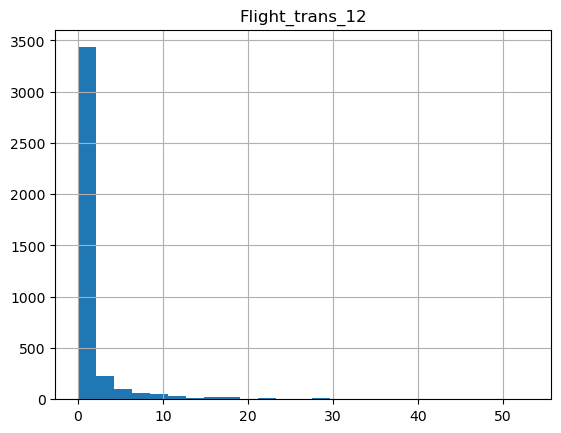

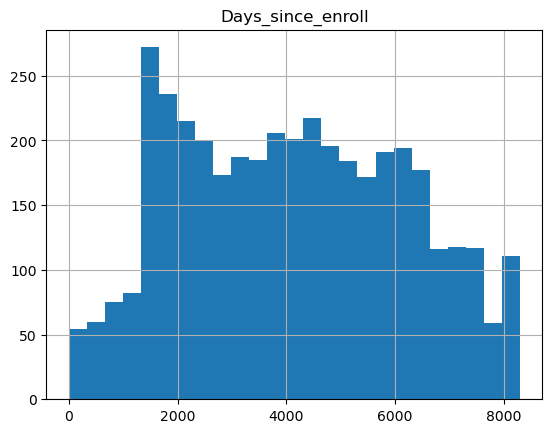

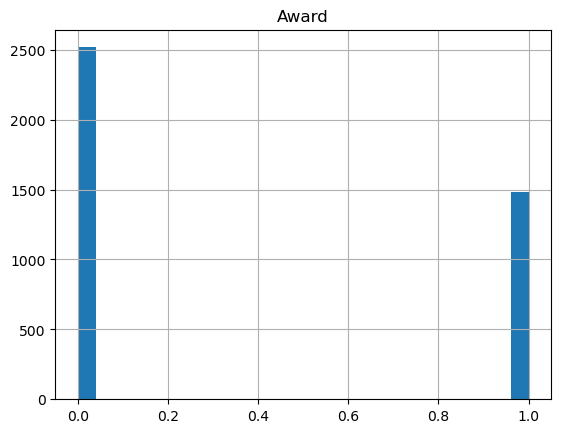

In [26]:
#Creating histograms to understand the distribution
for feature in airlines_data1.columns:
    airlines_data1[feature].hist(bins=25)
    plt.title(feature)
    plt.show()
    

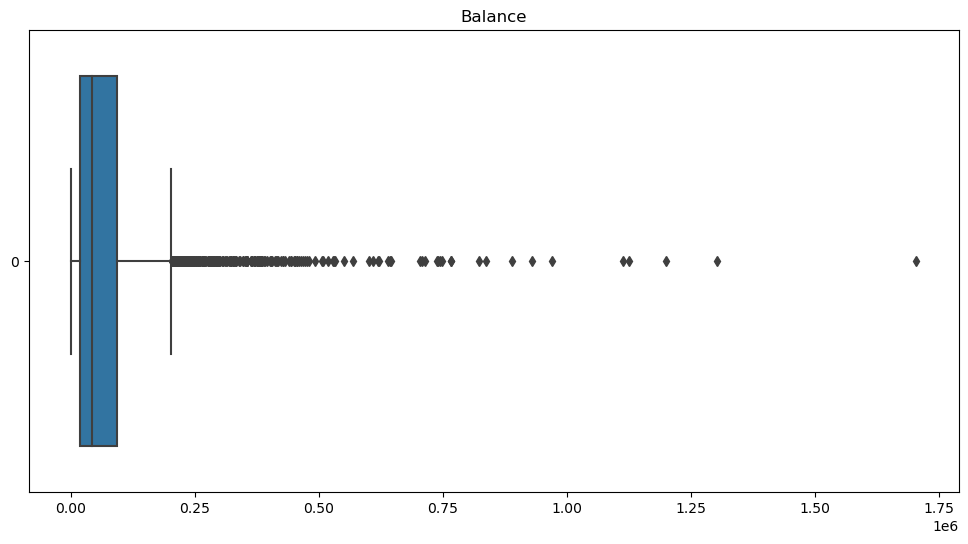

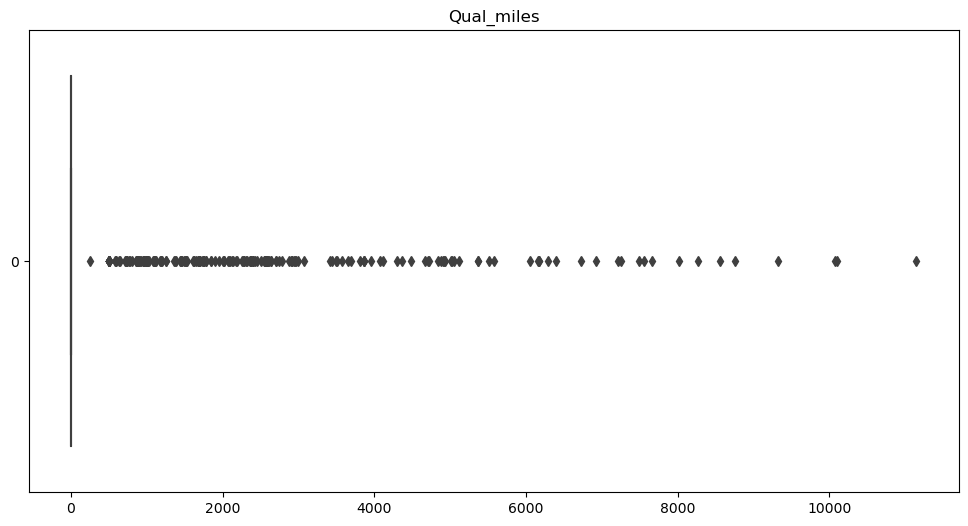

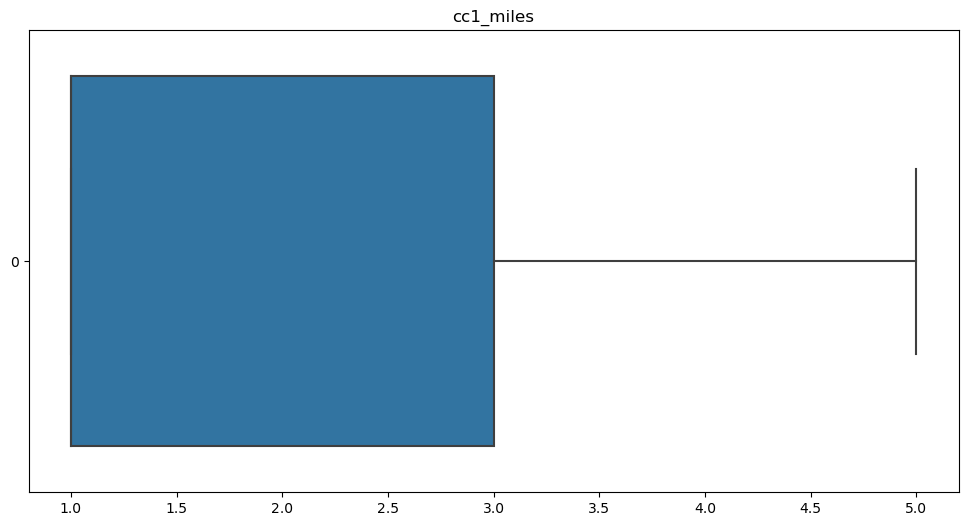

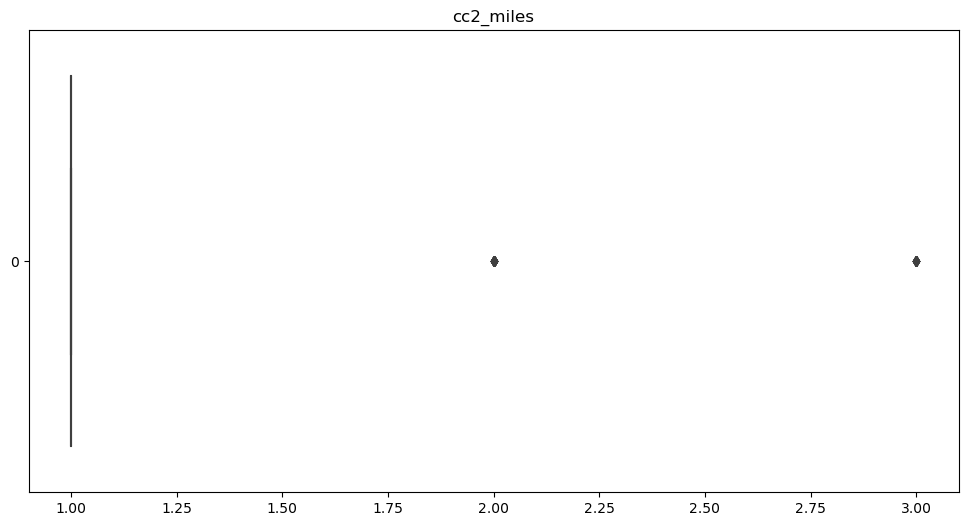

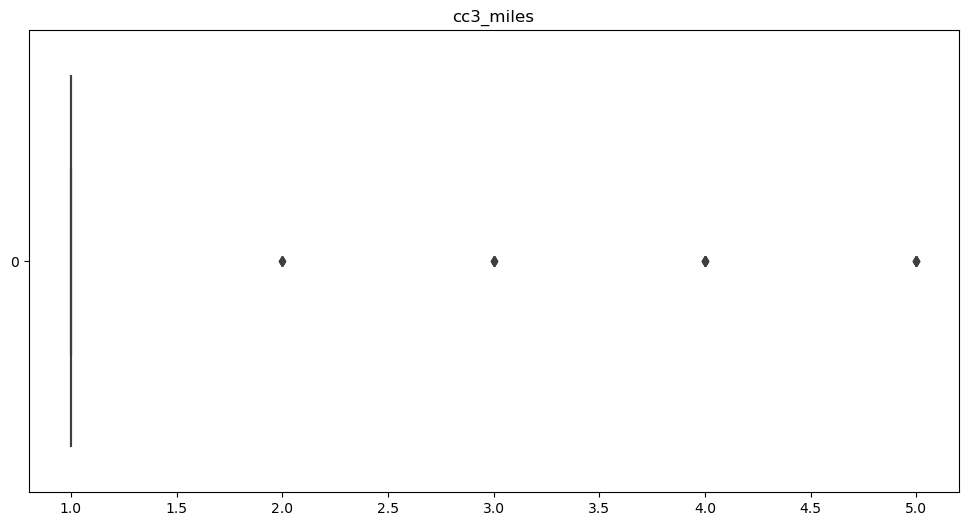

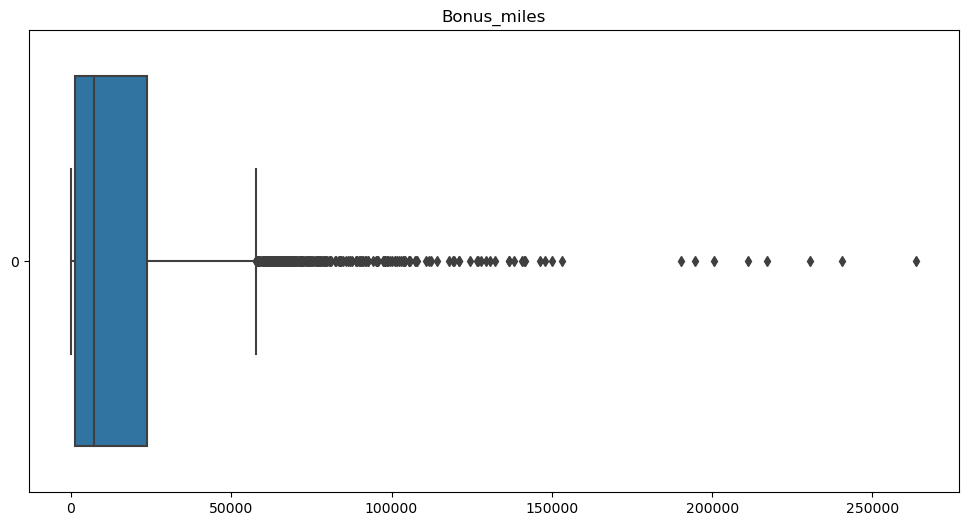

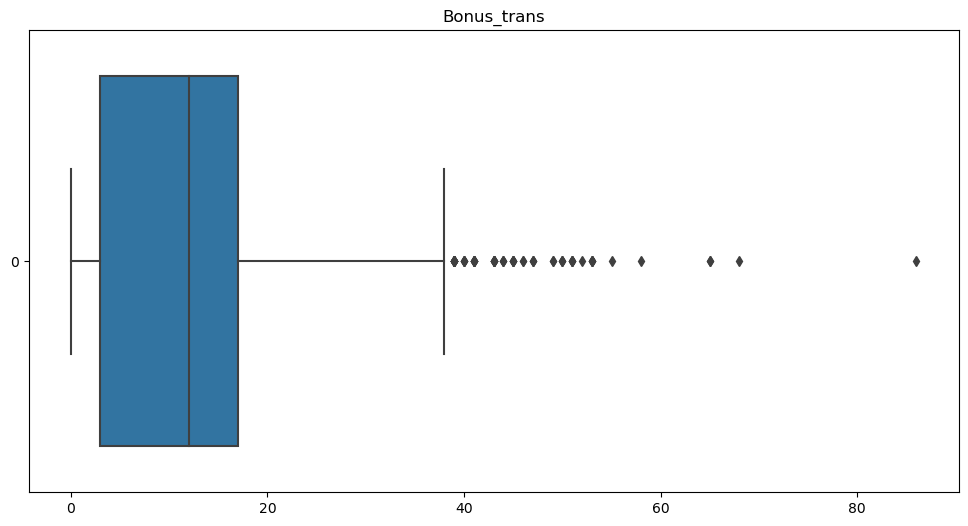

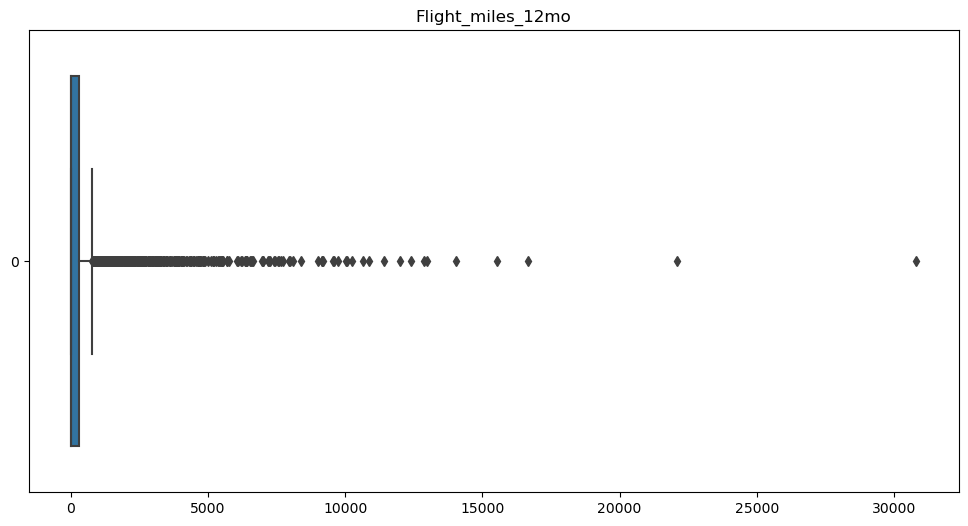

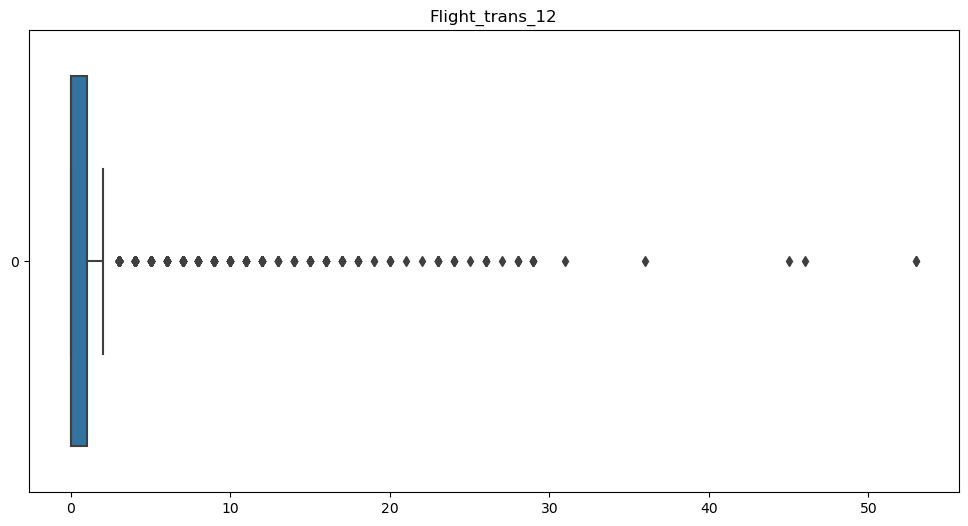

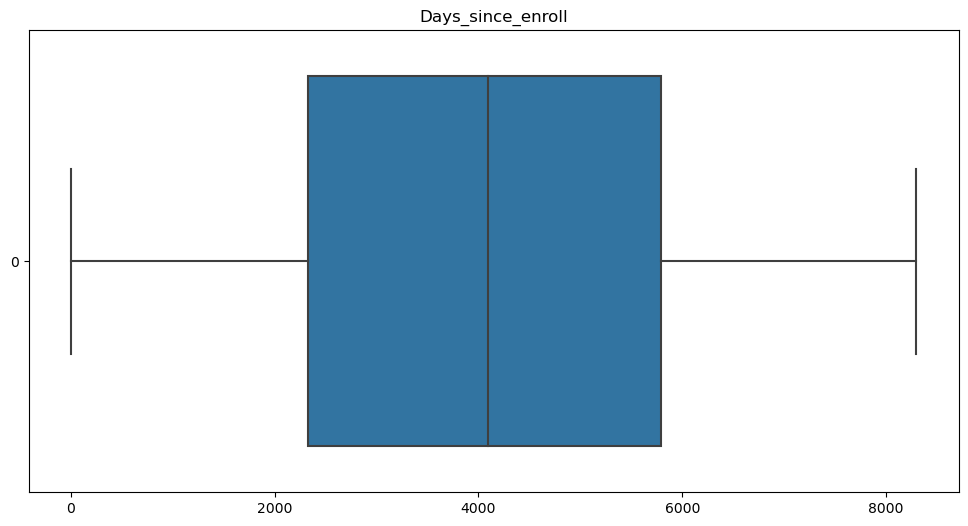

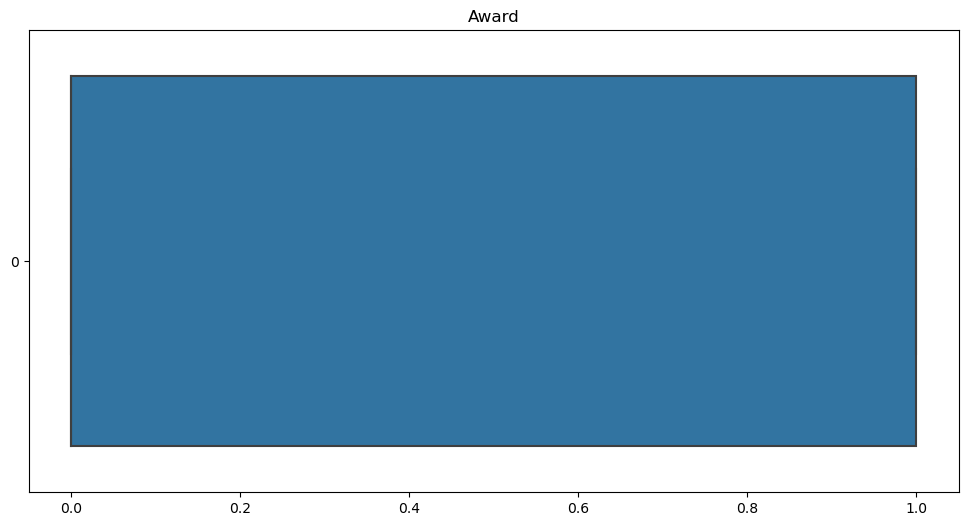

In [27]:
#Plotting box-plot for detecting outliers
for feature in airlines_data1.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(airlines_data1[feature],orient="h")
    plt.title(feature)
    plt.show()

<AxesSubplot: xlabel='Award', ylabel='count'>

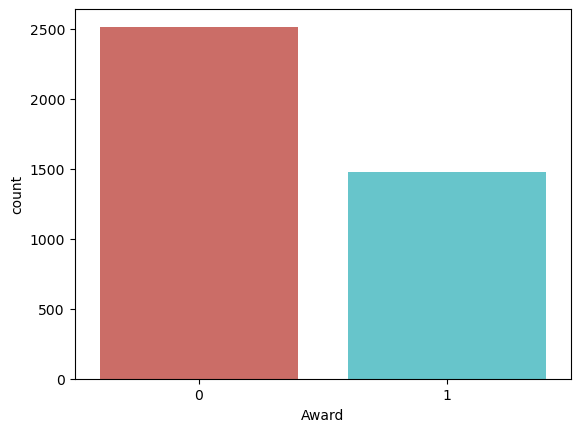

In [29]:
#countplot for whether clinet has award or not
sns.countplot(x='Award',data=airlines_data1,palette='hls')

In [30]:
airlines_data1.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [ ]:
#Preprocessing the data
#Normalization using the custom function

In [32]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [34]:
airlines_data1_norm = norm_func(airlines_data1)
airlines_data1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [36]:
#We can also normalize using minmax_scaler insead of custom function
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
airlines_data1_minmax = pd.DataFrame(minmax.fit_transform(airlines_data1))
airlines_data1_minmax

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


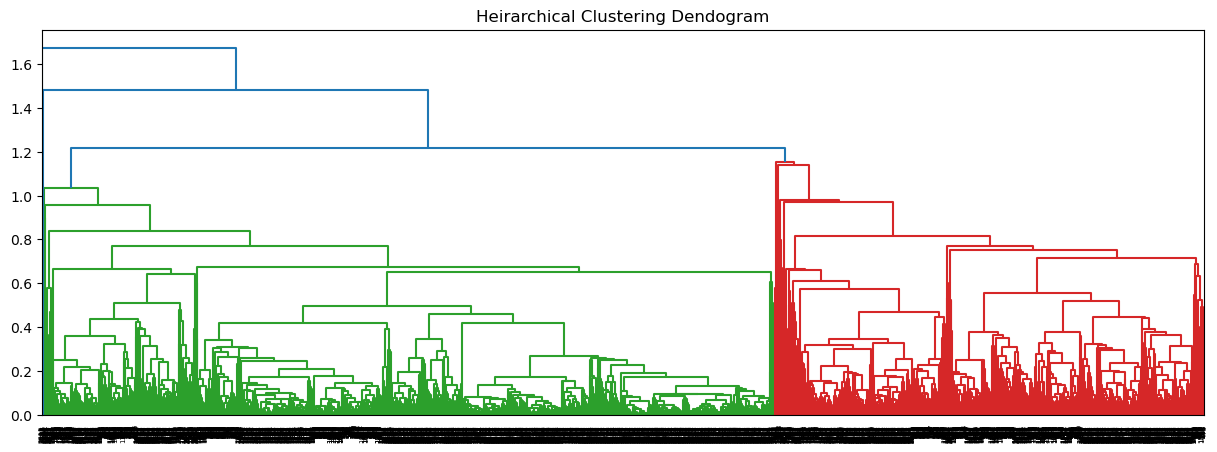

In [37]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
z = linkage(airlines_data1_norm,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Heirarchical Clustering Dendogram")
sch.dendrogram(z)
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=7,linkage='average',affinity='euclidean').fit(airlines_data1_norm)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

airlines_data_clust = airlines_data1.copy()
airlines_data_clust["clust"] = cluster_labels
airlines_data_clust

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,1


In [51]:
airlines_data_clust.groupby('clust').agg(['mean']).reset_index()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.470821e+04,241.560192,2.647059,1.015732,1.000684,27548.586183,15.493844,797.608071,2.446648,4620.122435,1.0
1,1,5.941703e+04,87.881673,1.701992,1.013944,1.000797,10066.370120,9.100797,225.898008,0.651394,3820.964143,0.0
2,2,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0
3,3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
4,4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0
5,5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
6,6,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0


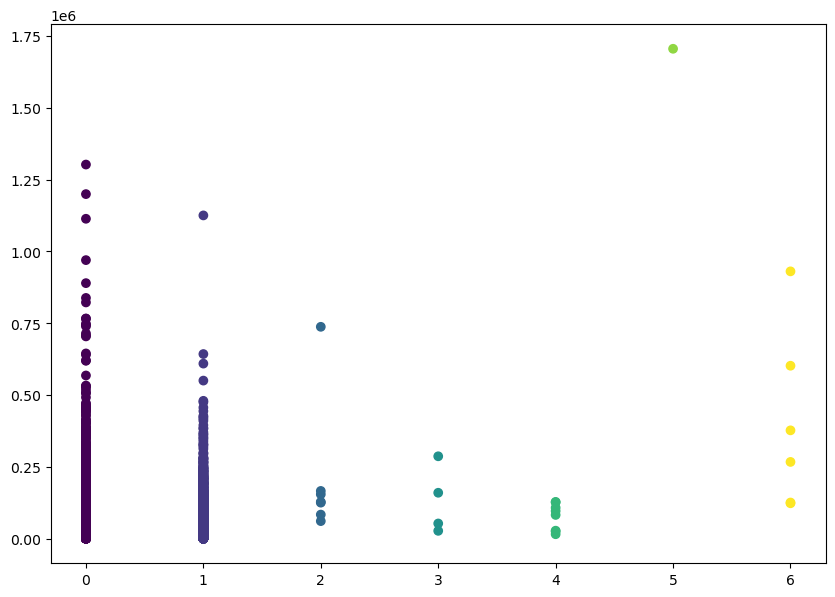

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_clust['clust'],airlines_data_clust['Balance'], c=h_complete.labels_)

In [53]:
data = airlines_data_clust[(airlines_data_clust.clust==0)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3986,11933,0,1,1,1,249,3,79,1,1412,1,0
3988,2622,0,1,1,1,1625,6,0,0,1404,1,0
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0


In [54]:
#Trying with the Standard Scaler preprocessing method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
airlines_data1_stnd = pd.DataFrame(scaler.fit_transform(airlines_data1))
airlines_data1_stnd

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


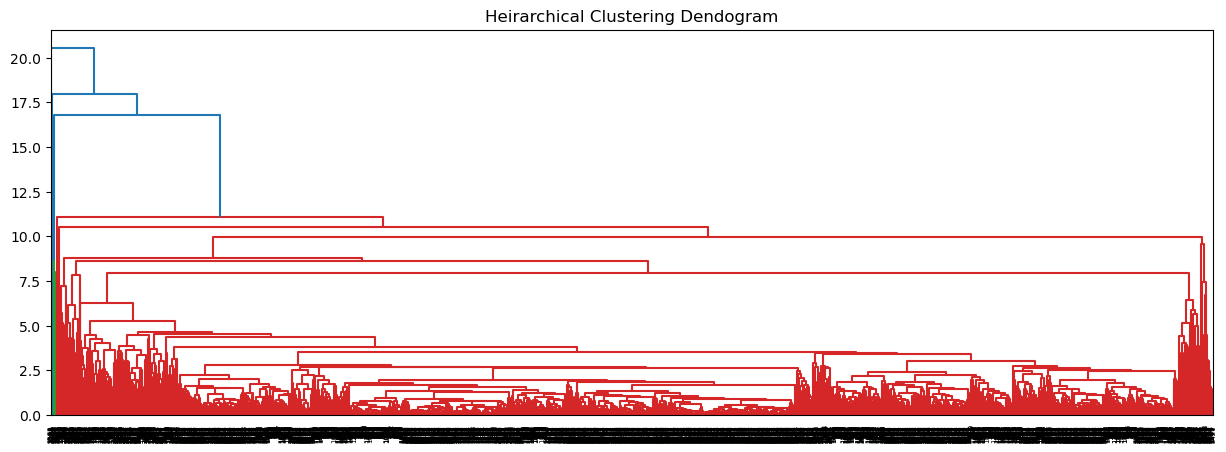

In [55]:
z1 = linkage(airlines_data1_stnd,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Heirarchical Clustering Dendogram")
sch.dendrogram(z1)
plt.show()

In [61]:

h_complete1 = AgglomerativeClustering(n_clusters=5,linkage='single',affinity='euclidean').fit(airlines_data1_stnd)

cluster_labels_stnd = pd.Series(h_complete1.labels_)
cluster_labels_stnd

airlines_data_clust_stnd = airlines_data1.copy()
airlines_data_clust_stnd["clust"] = cluster_labels_stnd
airlines_data_clust_stnd

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


In [62]:
airlines_data_clust_stnd.groupby('clust').agg(['mean']).reset_index()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,7.323655e+04,145.412092,2.070326,1.0,1.012396,17162.032633,11.516317,450.055654,1.346319,4120.718948,0.369846
1,1,7.779364e+04,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857
2,2,5.223140e+04,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
3,3,1.601140e+05,500.000000,1.000000,1.0,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000
4,4,1.704838e+06,0.000000,1.000000,1.0,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000


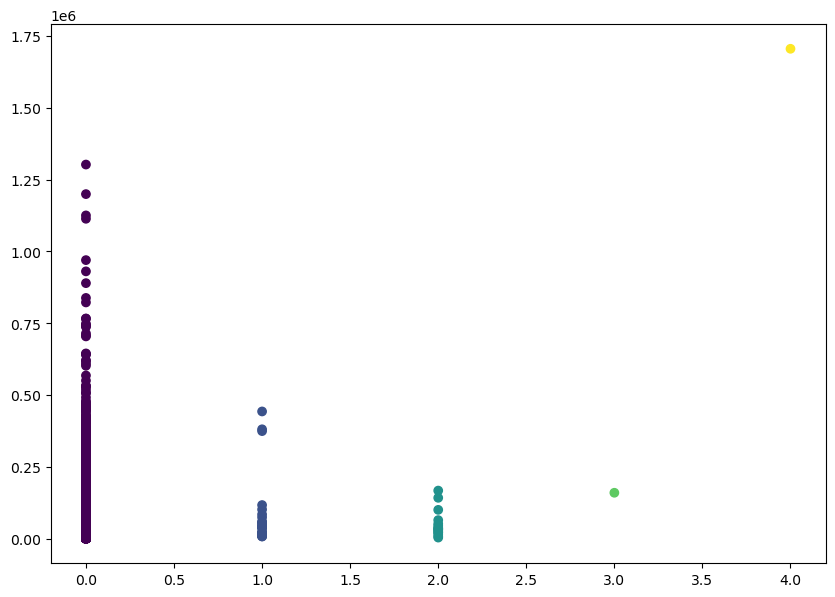

In [63]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_clust_stnd['clust'],airlines_data_clust_stnd['Balance'], c=h_complete1.labels_)

# K-Means Clustering

In [ ]:
#Using the standardized data(airlines_data1_stnd)

Text(0, 0.5, 'WCSS')

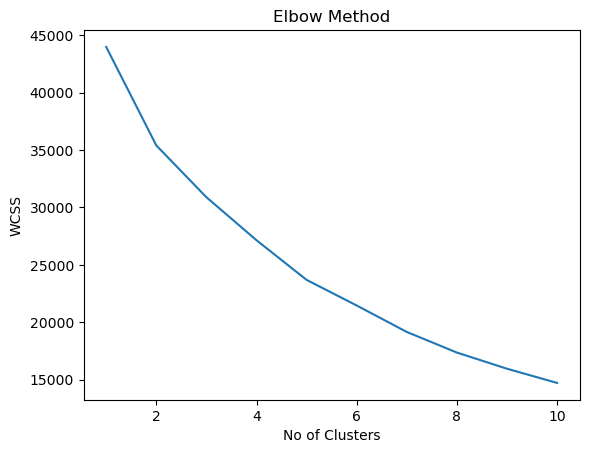

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(airlines_data1_stnd)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

In [66]:
#taking k = 4 and building cluster algorithm
clf4 = KMeans(n_clusters=4)
y_kmeans4 = clf4.fit_predict(airlines_data1_norm)

In [67]:
clf4.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [68]:
y_kmeans4

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [69]:
clf4.cluster_centers_

array([[ 2.39134635e-02,  8.28799020e-03,  2.32067511e-02,
         8.96624473e-03,  1.05485232e-03,  1.26549175e-02,
         7.54894024e-02,  7.35695912e-03,  1.24392962e-02,
         4.36240447e-01, -8.88178420e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01,  1.49880108e-15]])

In [70]:
clf4.inertia_

436.6420890935959

In [71]:
kmeans4_clust = pd.Series(y_kmeans4)
airlines_data_clust_kmeans = airlines_data1.copy()
airlines_data_clust_kmeans["clust4"] = kmeans4_clust
airlines_data_clust_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust4
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,2
3994,64385,0,1,1,1,981,5,0,0,1395,1,2
3995,73597,0,3,1,1,25447,8,0,0,1402,1,1
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


In [72]:
airlines_data_clust_kmeans.groupby('clust4').agg(['mean']).reset_index()

,clust4,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40768.581224,92.394515,1.092827,1.017932,1.004219,3336.911920,6.492089,226.719409,0.659283,3620.178270,0.0
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


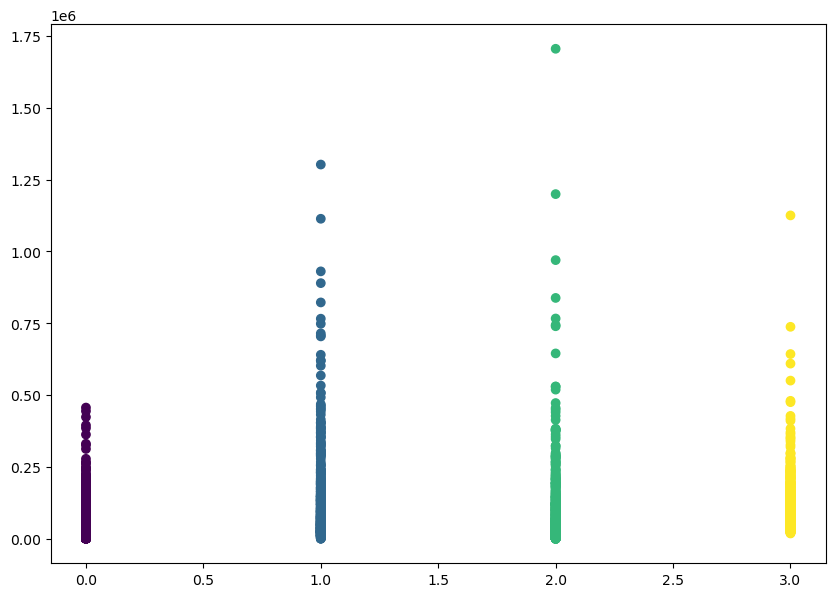

In [73]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_clust_kmeans['clust4'],airlines_data_clust_kmeans['Balance'], c=clf4.labels_)

In [74]:
wcss

[43978.00000000003,
 35402.348376211754,
 30893.14033023642,
 27148.766543632086,
 23696.221880242287,
 21466.726127778136,
 19163.131137236014,
 17368.87907071832,
 15961.460885732215,
 14726.510181556067]

In [ ]:
#K_means using clusters=5 

In [76]:
kmeans5_clust = KMeans(5).fit(airlines_data1_norm)
kmeans5_clust

KMeans(n_clusters=5)

In [78]:
kmeans5_clust.labels_

array([1, 1, 1, ..., 0, 4, 4], dtype=int32)

In [79]:
kmeans5_clust.inertia_

348.93474964504037

In [81]:
kmeans5_clust.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  8.88178420e-16],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01,  1.49880108e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 1.94320126e-02,  8.45201690e-03,  1.77012609e-02,
         8.24442289e-03,  1.69738118e-03,  1.23164659e-02,
  

In [80]:
airlines_data_clust_kmeans["clust5"] = kmeans5_clust.labels_
airlines_data_clust_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust4,clust5
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3994,64385,0,1,1,1,981,5,0,0,1395,1,2,3
3995,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0,4


In [82]:
airlines_data_clust_kmeans.groupby('clust5').agg(['mean']).reset_index()

,clust5,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust4
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1.000000
1,1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,0.010369
2,2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,3.000000
3,3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,2.000000
4,4,33128.433560,94.223084,1.070805,1.016489,1.006790,3247.667313,6.179437,213.057226,0.604268,1992.785645,0.0,0.000000


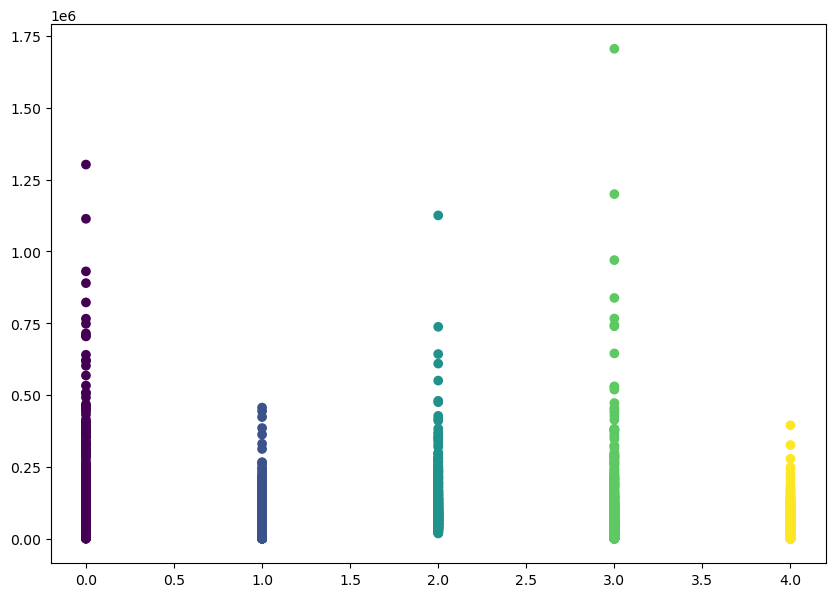

In [83]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_clust_kmeans['clust5'],airlines_data_clust_kmeans['Balance'], c=kmeans5_clust.labels_)

# DBSCAN

In [ ]:
#we are using the same dataset which is used for Heriachical and K-Means Ckustering

In [86]:
x = scaler.fit_transform(airlines_data1)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [84]:
from sklearn.neighbors import NearestNeighbors

In [147]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(x)
distances , indices = nbrs.kneighbors(x)


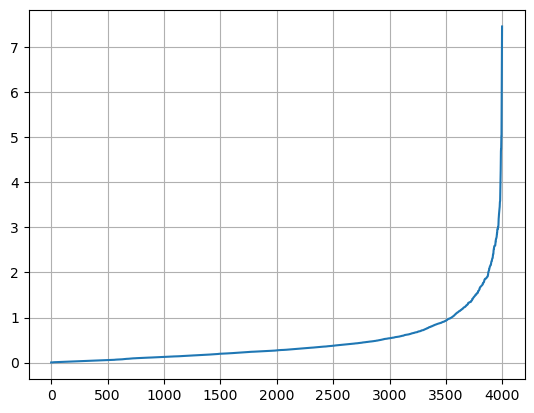

In [148]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)


In [149]:
#Lets take eps as 1.5 and try DBSCAN Algorithm 
from sklearn.cluster import DBSCAN

In [205]:
dbscan = DBSCAN(eps=1.5,min_samples=12)
dbscan.fit(x)

DBSCAN(eps=1.5, min_samples=12)

In [206]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [207]:
clust_dbscan = pd.Series(dbscan.labels_)
airlines_data_clust_dbscan = airlines_data1.copy()
airlines_data_clust_dbscan["clust(1.5)"] = clust_dbscan
airlines_data_clust_dbscan

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust(1.5)
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,64385,0,1,1,1,981,5,0,0,1395,1,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1,1
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


In [208]:
dl = dbscan.labels_

In [209]:
airlines_data_clust_dbscan.groupby('clust(1.5)').agg(['mean']).reset_index()

,clust(1.5),Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,204967.974293,1246.987147,2.673522,1.11054,1.125964,42283.498715,23.388175,2588.511568,7.596401,4722.434447,0.717224
1,0,55387.081940,21.896739,1.680184,1.00000,1.000000,9505.225334,8.688127,168.705268,0.494147,3804.165970,0.000000
2,1,67831.876872,32.328619,2.629784,1.00000,1.000000,24328.774542,13.579035,356.396839,1.123128,4559.961730,1.000000
3,2,38556.733333,0.000000,1.000000,2.00000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000


In [231]:
import sklearn
sklearn.metrics.silhouette_score(x,dl)

0.24489026233977673

In [ ]:
#using minmax normalization data

In [211]:
y = minmax.fit_transform(airlines_data1)
y

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [224]:
dbscan1 = DBSCAN(eps=1,min_samples=22)
dbscan1.fit(y)

DBSCAN(eps=1, min_samples=22)

In [225]:
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [226]:
clust_dbscan1 = pd.Series(dbscan1.labels_)
airlines_data_clust_dbscan_minmax = airlines_data1.copy()
airlines_data_clust_dbscan_minmax["clust(1.5)"] = clust_dbscan1
airlines_data_clust_dbscan_minmax

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust(1.5)
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,64385,0,1,1,1,981,5,0,0,1395,1,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1,1
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


In [227]:
dl1 = dbscan1.labels_

In [228]:
airlines_data_clust_dbscan_minmax.groupby('clust(1.5)').agg(['mean']).reset_index()

,clust(1.5),Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0
1,1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


In [230]:
sklearn.metrics.silhouette_score(y,dl1)

0.535888544052936